# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

**Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;**

**Контролировать добросовестность кассиров при продаже алкоголя.**

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Исследовательский анализ данных

### Загрузка и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 


features, target = next(train_gen_flow)

Found 7591 validated image filenames.


In [3]:
def basic_properties (data):
    print('Размер датасета:',data.shape)
    display(data.head(10))
    print('-' * 100, '\n')
    display(data.info())
    print('-' * 100, '\n')
    print('Количество пропусков:')
    display(data.isna().sum())
    print('Нулевые значения:')
    print(data.isnull().sum())
    print('-' * 100, '\n')
    print('Основная статистика:')
    display(data.describe())
    print('-' * 100, '\n')
    

In [4]:
basic_properties(labels)

Размер датасета: (7591, 2)


file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17
5  000005.jpg        27
6  000006.jpg        24
7  000007.jpg        43
8  000008.jpg        26
9  000009.jpg        39

---------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


None

---------------------------------------------------------------------------------------------------- 

Количество пропусков:


file_name    0
real_age     0
dtype: int64

Нулевые значения:
file_name    0
real_age     0
dtype: int64
---------------------------------------------------------------------------------------------------- 

Основная статистика:


real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000

---------------------------------------------------------------------------------------------------- 



Для этой задачи оптимально было бы иметь выборку на 15 000, т е в 2 раза больше чем у нас есть, но 7591 - приемлемо если применим аугментацию


In [5]:
print(features.shape)

(32, 224, 224, 3)


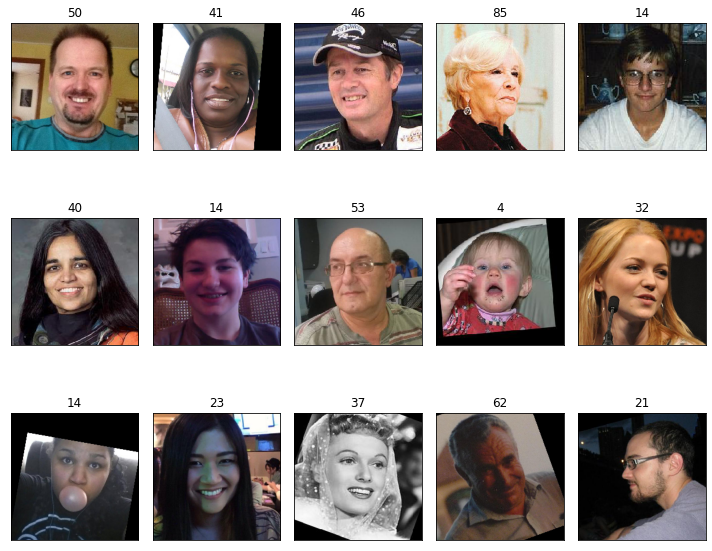

In [6]:
fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(3, 5, i+1)
    plt.title(target[i])
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

### График распределения возраста в выборке.

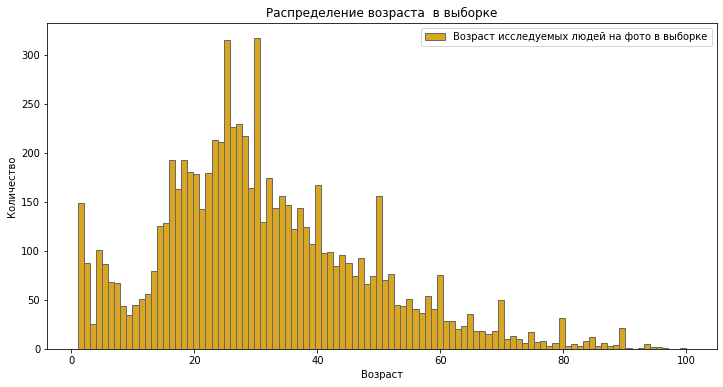

In [7]:
plt.figure(figsize=(12,6))
    
plt.hist(
    data=labels, 
    x='real_age', 
    bins=100,  
    edgecolor='DimGrey', 
    color='GoldenRod', 
    label='Возраст исследуемых людей на фото в выборке'
)
plt.legend()
plt.title('Распределение возраста  в выборке')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()     

Посмотрим рандомно отобраные изображения разных возрастных групп: пограничный возраст совершеннолетия, пиковые значения 25 и 30, от 60 лет и менее 7

Реальный возраст: 16


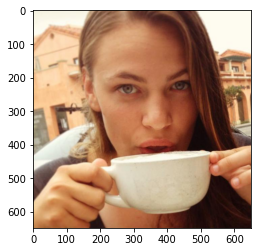

Реальный возраст: 16


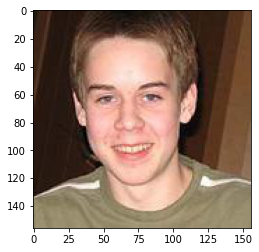

Реальный возраст: 16


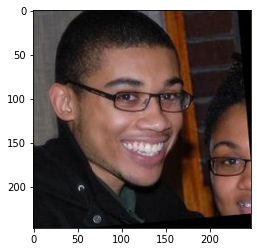

Реальный возраст: 18


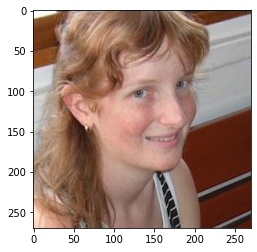

Реальный возраст: 19


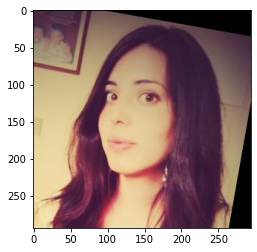

Реальный возраст: 19


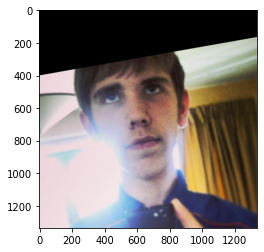

Реальный возраст: 18


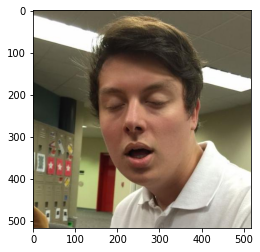

Реальный возраст: 19


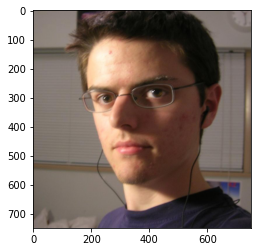

Реальный возраст: 17


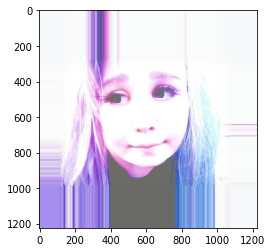

Реальный возраст: 16


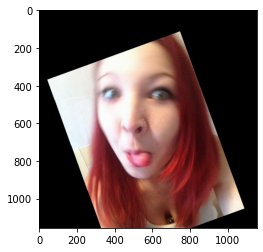

Реальный возраст: 25


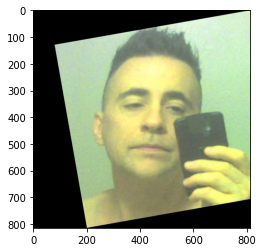

Реальный возраст: 25


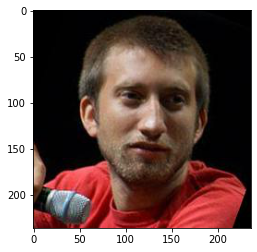

Реальный возраст: 25


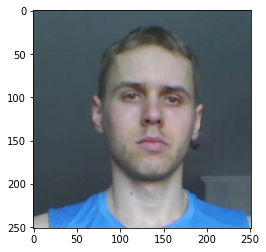

Реальный возраст: 25


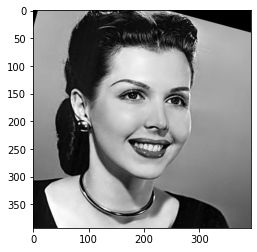

Реальный возраст: 25


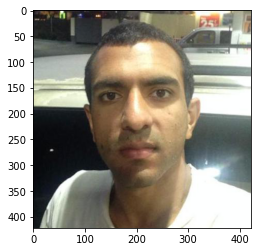

Реальный возраст: 25


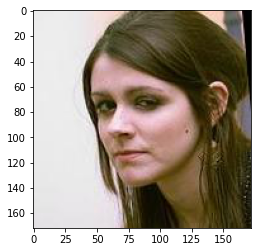

Реальный возраст: 25


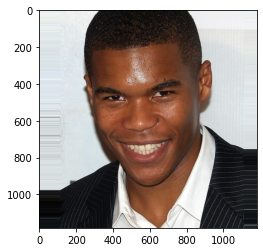

Реальный возраст: 25


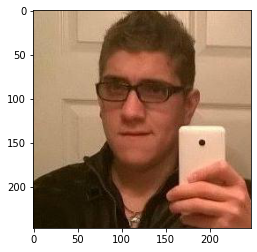

Реальный возраст: 25


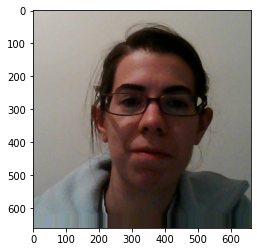

Реальный возраст: 25


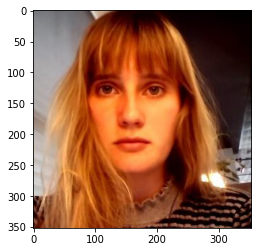

Реальный возраст: 30


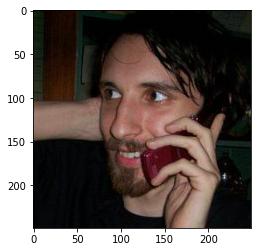

Реальный возраст: 30


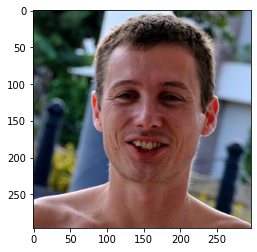

Реальный возраст: 30


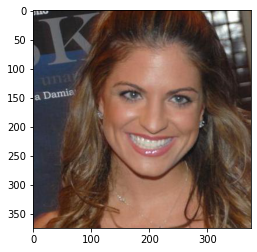

Реальный возраст: 30


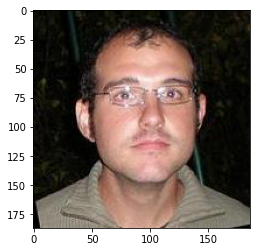

Реальный возраст: 30


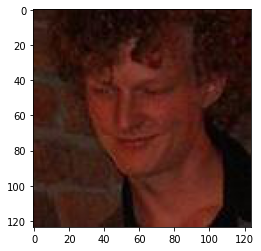

Реальный возраст: 30


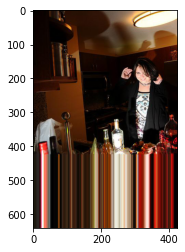

Реальный возраст: 30


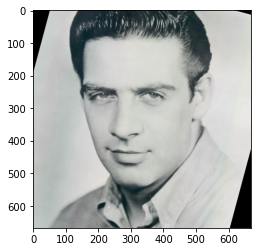

Реальный возраст: 30


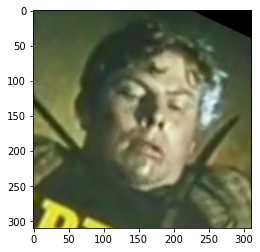

Реальный возраст: 30


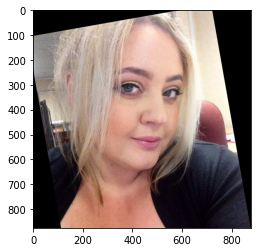

Реальный возраст: 30


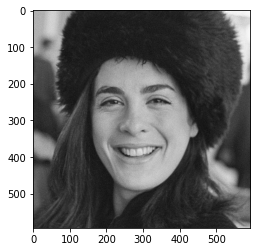

Реальный возраст: 62


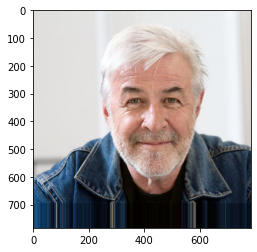

Реальный возраст: 60


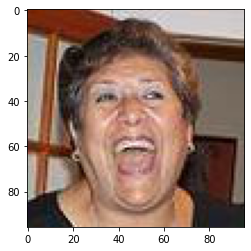

Реальный возраст: 60


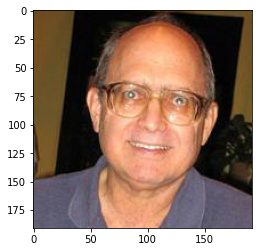

Реальный возраст: 64


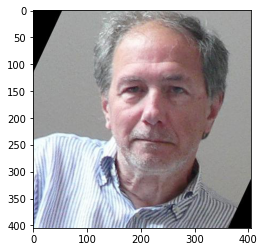

Реальный возраст: 73


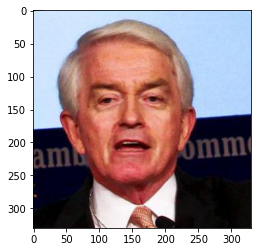

Реальный возраст: 93


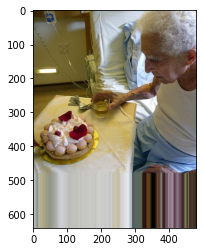

Реальный возраст: 60


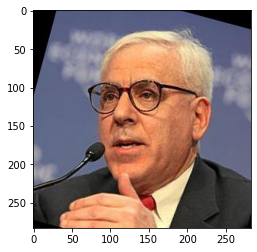

Реальный возраст: 61


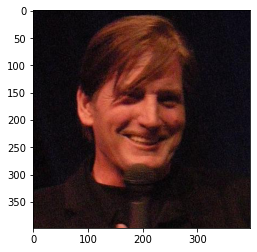

Реальный возраст: 66


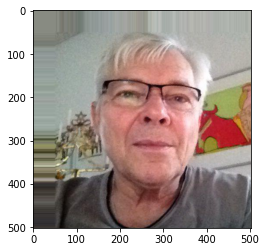

Реальный возраст: 90


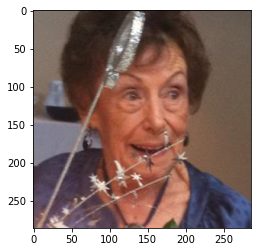

Реальный возраст: 5


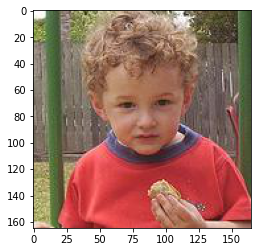

Реальный возраст: 6


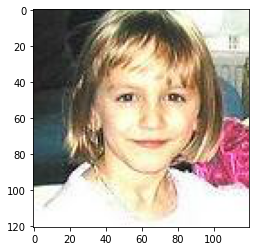

Реальный возраст: 5


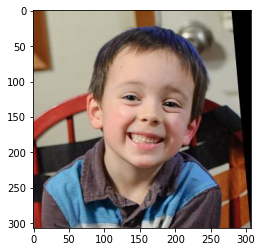

Реальный возраст: 2


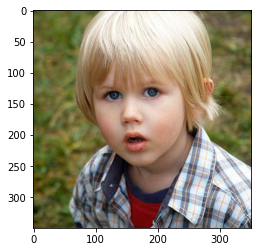

Реальный возраст: 1


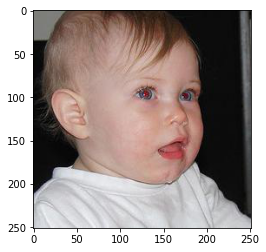

Реальный возраст: 5


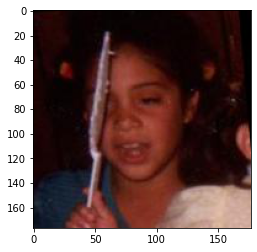

Реальный возраст: 1


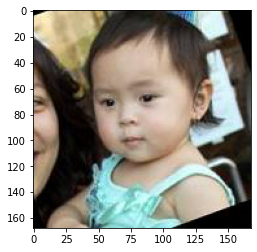

Реальный возраст: 4


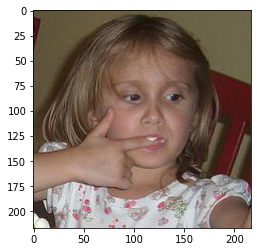

Реальный возраст: 6


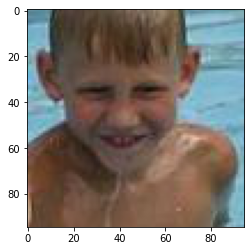

Реальный возраст: 4


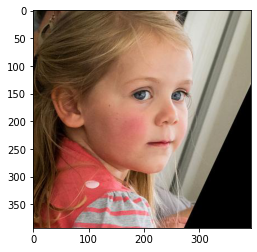

In [8]:
def image_age(data):
    for i, row in data.sample(10, random_state = 42).iterrows():
        print('Реальный возраст:', row['real_age'])
        image = Image.open('/datasets/faces/final_files/' +
                          row['file_name'])
        plt.imshow(image)
        plt.show()
        
adults_18 = labels.query('16 <= real_age <= 19')
adults_25 = labels.query('real_age == 25')
adults_30 = labels.query('real_age == 30')
adults_60 = labels.query('real_age >= 60')
adults_7 = labels.query('real_age < 7')

image_age(adults_18)
image_age(adults_25)
image_age(adults_30)
image_age(adults_60)
image_age(adults_7)

### Вывод
1. Датасет представляет собой набор изображений людей разных возрастов с разметкой, всего 7591
2. Изображения представлены как цветные так и черно-белые
3. Изображения с разрешением 224х224, цвета RGB - три канала 
4. Диапазон возрастов от 1-100 лет
5. Больше всего изображений 20-40 лет (25, 30 пиковые значения)
6. Встречаются некорректные изображения на которых плохо видно лицо и возраст сложно идентифицировать, если почистить данные от таких изображений- результат будет лучше
7. Изображения повернуты так чтобы лицо было в вертикальном положении и вписаны размер, соответственно повороты и отражение по вертикали не требуется при аугментации, оставим только отражение по горизонтали.
8. Предполагаю что выполнение задачи контроля продажи алкоголя будет с приличной погрешностью - т к  лица в возрасте 16-17-..25 лет могут быть ошибочно идентифицированы

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras.layers import Conv2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    
    train_datagen = ImageDataGenerator(validation_split=0.25,
                                       horizontal_flip=True,
                                       rescale=1./255)
    train_datagen_flow = train_datagen.flow_from_dataframe(dataframe=labels,
                                                           directory=path + 'final_files/',
                                                           x_col='file_name',
                                                           y_col='real_age',
                                                           target_size=(224, 224),
                                                           batch_size=32,
                                                           class_mode='raw',
                                                           subset='training',
                                                           seed=12345)

    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    
    test_datagen_flow = test_datagen.flow_from_dataframe(dataframe=labels,
                                                         directory=path + 'final_files/',
                                                         x_col='file_name',
                                                         y_col='real_age',
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='raw',
                                                         subset='validation',
                                                         seed=12345)

    return test_datagen_flow

def create_model(input_shape):
    backbone = ResNet50(weights='imagenet', input_shape=input_shape, include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(learning_rate = 0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=16,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model


```

```

 ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/16
2023-11-04 12:36:59.987652: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-11-04 12:37:00.294122: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 47s - loss: 221.9824 - mae: 10.7368 - val_loss: 818.6788 - val_mae: 23.7147
Epoch 2/16
178/178 - 38s - loss: 76.1455 - mae: 6.5188 - val_loss: 688.2744 - val_mae: 21.0483
Epoch 3/16
178/178 - 39s - loss: 48.1972 - mae: 5.2621 - val_loss: 365.1915 - val_mae: 14.5054
Epoch 4/16
178/178 - 38s - loss: 35.7930 - mae: 4.5626 - val_loss: 103.0720 - val_mae: 7.6607
Epoch 5/16
178/178 - 38s - loss: 26.8597 - mae: 3.9342 - val_loss: 88.4428 - val_mae: 7.0991
Epoch 6/16
178/178 - 38s - loss: 22.2073 - mae: 3.6050 - val_loss: 80.9871 - val_mae: 7.0309
Epoch 7/16
178/178 - 38s - loss: 18.7081 - mae: 3.3019 - val_loss: 66.4480 - val_mae: 6.0907
Epoch 8/16
178/178 - 38s - loss: 15.1728 - mae: 2.9763 - val_loss: 71.9072 - val_mae: 6.4559
Epoch 9/16
178/178 - 39s - loss: 12.7285 - mae: 2.7440 - val_loss: 85.3561 - val_mae: 6.8963
Epoch 10/16
178/178 - 38s - loss: 11.7680 - mae: 2.6282 - val_loss: 63.8636 - val_mae: 6.0394
Epoch 11/16
178/178 - 39s - loss: 10.1119 - mae: 2.3751 - val_loss: 64.0323 - val_mae: 5.9992
Epoch 12/16
178/178 - 38s - loss: 8.5338 - mae: 2.2138 - val_loss: 62.9124 - val_mae: 5.7940
Epoch 13/16
178/178 - 38s - loss: 7.8351 - mae: 2.1112 - val_loss: 62.3053 - val_mae: 5.8763
Epoch 14/16
178/178 - 38s - loss: 8.1939 - mae: 2.1593 - val_loss: 63.7161 - val_mae: 5.9013
Epoch 15/16
178/178 - 38s - loss: 7.7906 - mae: 2.1090 - val_loss: 62.1127 - val_mae: 5.8192
Epoch 16/16
178/178 - 39s - loss: 7.0949 - mae: 2.0212 - val_loss: 64.2606 - val_mae: 6.0019
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 64.2606 - mae: 6.0019
Test MAE: 6.0019

```

## Анализ обученной модели

**Получен результат MAE: 6.0019**
1. Для решения задачи использовалась нейросеть с архитектурой ResNet50 (backbone + GlobalAveragePooling2D, Dense(1, activation='relu')), применялись предобученные весы weights='imagenet'
2. Параметры обучения: 
 * batch_size=None
 * epochs=16
 * optimizer = Adam(learning_rate = 0.0001)
3. Модель определяет возраст с погрешностью около 6 лет.
4. Это означает что для задачи "анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы" модель справится хорошо -погрешность не сильно повлияет. Результат будет лучше если из выборки убрать данные 80+ и поделить данные на возрастные группы по потребностям.
5. Для второй задачи - "контролировать добросовестность кассиров при продаже алкоголя" - данная модель подходит  лишь частично, можно например выставить ограничение в 25 лет, тогда продажа несовершеннолетним будет исключена, в случаях менее 25 проводить проверку документов подтверждающих возраст, что не соответствует условию задачи - кассир может не проверить и совершить продажу лицу недостигшему совершеннолетнего возраста, т е остается риск компании получить штраф. 